In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import re
from IPython.display import display, HTML
import HTMLParser
import pickle
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2)


def load_pickle(fname):
    f = open(fname)
    var = pickle.load(f)
    f.close()
    return var

def dump_pickle(variable,fname):
    f = open(fname, 'w')
    pickle.dump(variable, f)
    f.close()
    return None

state_list = pd.read_csv('states.csv')

def check_if_is_US_states(x,full_list):
    if (x in full_list):
        return 'US'
    else:
        return x

# === Exchange rate ===    
Dollar_value_dict = dict()
Dollar_value_dict['USD'] = 1.
Dollar_value_dict['GBP'] = 1.24139
Dollar_value_dict['CAD'] = 0.7473
Dollar_value_dict['EUR'] = 1.08175
Dollar_value_dict['AUD'] = 0.764275
Dollar_value_dict['SEK'] = 0.113205
Dollar_value_dict['NZD'] = 0.7006
Dollar_value_dict['DKK'] = 0.145372
Dollar_value_dict['CHF'] = 1.007658
Dollar_value_dict['SGD'] = 0.715666
Dollar_value_dict['HKD'] = 0.128731
Dollar_value_dict['MXN'] = 0.052551
Dollar_value_dict['NOK'] = 0.116974

def length_of_blurb(x):
    try:
        ans = len(x.split())
    except:
        print 'error'
        print x
        ans = np.NaN
    return ans
    

In [2]:
for df_type in ['live','most_backed']:

    df0 = pd.read_csv(df_type+'_project_df2_0.csv')
    df1 = pd.read_csv(df_type+'_project_df2_1.csv')
    df2 = pd.read_csv(df_type+'_project_df2_2.csv')
    df3 = pd.read_csv(df_type+'_project_df2_3.csv')
    df4 = pd.read_csv(df_type+'_project_df2_4.csv')

    # === Construct and clean data ===
    df = pd.concat([df0,df1,df2,df3,df4],ignore_index=True)
    df["Project blurb"] = df["Project blurb"].apply(lambda x: str(x).strip())
    df["State"] = df["State"].apply(lambda x: x.strip())
    #     display(df.head())

    # === Map countries ===
    df['Country_FullName'] = df['State'].apply(lambda x: check_if_is_US_states(x,state_list.Abbreviation.values))

    # df.head()
    df['Dollar_value'] = df['Dollar sign'].apply(lambda x: Dollar_value_dict[x.encode('ascii','ignore')])
    df['Amount'] = df['Amount'].apply(lambda x:pd.to_numeric(x))
    df['Goal'] = df['Goal'].apply(lambda x:pd.to_numeric(x))
    df['Actual_USD_value'] = df['Dollar_value'].multiply(df['Amount'])
    df['Actual_USD_Goal'] = df['Dollar_value'].multiply(df['Goal'])
    df['Percent_achieved'] = df['Actual_USD_value'] / df['Actual_USD_Goal']
    df['blurb_length'] = df['Project blurb'].apply(lambda x:length_of_blurb(x))
    df['USD_per_backers'] = df['Actual_USD_value'] / df['number_of_backers']
    
    if df_type=='live':
        df_live = df
    else:
        df_most_backed = df
        
display(df_live.head())
# display(df_live.describe())
display(df_most_backed.head())    
# display(df_most_backed.describe())

,Unnamed: 0,Amount,Category,Country,Creator,Deadline,Dollar sign,Goal,Location,Project Link,...,Sub-category,Type,number_of_backers,Country_FullName,Dollar_value,Actual_USD_value,Actual_USD_Goal,Percent_achieved,blurb_length,USD_per_backers
0,0,56846.0,design,US,LetterformArchive,2017-04-28T19:44:36-04:00,USD,50000,"San Francisco, CA",/projects/letterformarchive/w-a-dwiggins-a-lif...,...,graphic design,Town,363.0,US,1.0,56846.0,50000.0,1.136920,21,156.600551
1,1,6355.0,film & video,US,Andy Bailey,2017-04-18T00:22:27-04:00,USD,30000,"Portland, OR",/projects/andymation/flip-book-animation-kit?r...,...,animation,Town,178.0,US,1.0,6355.0,30000.0,0.211833,19,35.702247
2,2,41431.0,music,US,Eric Townsend,2017-03-31T20:09:04-04:00,USD,10000,"Los Angeles, CA",/projects/946153346/daniel-amos-horrendous-dis...,...,rock,Town,626.0,US,1.0,41431.0,10000.0,4.143100,17,66.183706
3,3,7894.0,art,US,Print League KC,2017-04-07T17:08:21-04:00,USD,9500,"Kansas City, MO",/projects/1332864089/print-league-kc?ref=disco...,...,NaN,Town,138.0,US,1.0,7894.0,9500.0,0.830947,15,57.202899
4,4,20628.0,art,US,Clark Huggins,2017-04-19T16:00:00-04:00,USD,7500,"Providence, RI",/projects/2078704151/reckless-deck-solving-the...,...,illustration,Town,562.0,US,1.0,20628.0,7500.0,2.750400,19,36.704626


,Unnamed: 0,Amount,Goal,number_of_backers,Dollar_value,Actual_USD_value,Actual_USD_Goal,Percent_achieved,blurb_length,USD_per_backers
count,3980.000000,3.980000e+03,3.980000e+03,3.977000e+03,3980.000000,3.980000e+03,3.980000e+03,3980.000000,3980.000000,3391.000000
mean,9.500000,1.276921e+04,3.608224e+04,1.268198e+04,0.956004,1.023303e+04,2.696977e+04,0.808228,19.575879,87.020769
std,5.767006,9.150117e+04,2.218558e+05,7.936438e+05,0.254962,8.029101e+04,2.037547e+05,3.562052,4.377226,173.165442
min,0.000000,0.000000e+00,1.000000e+01,0.000000e+00,0.052551,0.000000e+00,1.000000e+01,0.000000,1.000000,0.000475
25%,4.750000,5.000000e+01,2.500000e+03,2.000000e+00,1.000000,5.000000e+01,2.163500e+03,0.007383,17.000000,28.561699
50%,9.500000,6.840000e+02,7.475000e+03,1.100000e+01,1.000000,6.180459e+02,6.206950e+03,0.140000,20.000000,50.500000
75%,14.250000,4.183500e+03,2.000000e+04,4.900000e+01,1.000000,3.587500e+03,1.700000e+04,0.738321,23.000000,89.307292
max,19.000000,3.254677e+06,9.000000e+06,5.005001e+07,1.241390,3.254677e+06,9.000000e+06,119.906200,30.000000,3817.865082


,Unnamed: 0,Amount,Category,Country,Creator,Dollar sign,Goal,Location,Project Link,Project blurb,...,Sub-category,Type,number_of_backers,Country_FullName,Dollar_value,Actual_USD_value,Actual_USD_Goal,Percent_achieved,blurb_length,USD_per_backers
0,0,8782571.99,games,US,Elan Lee,USD,10000,"Los Angeles, CA",/projects/elanlee/exploding-kittens?ref=most_b...,This is a card game for people who are into ki...,...,tabletop games,Town,219382,US,1.0,8782571.99,10000.0,878.257199,19,40.033239
1,1,6465690.30,design,US,Matthew and Mark McLachlan,USD,15000,"Denver, CO",/projects/antsylabs/fidget-cube-a-vinyl-desk-t...,"An unusually addicting, high-quality desk toy ...",...,product design,Town,154926,US,1.0,6465690.30,15000.0,431.046020,21,41.734056
2,2,5408916.95,technology,US,LeVar Burton & Reading Rainbow,USD,1000000,"Los Angeles, CA",/projects/readingrainbow/bring-reading-rainbow...,Bring Reading Rainbow’s library of interactive...,...,web,Town,105857,US,1.0,5408916.95,1000000.0,5.408917,22,51.096450
3,3,5702153.38,film & video,US,Rob Thomas,USD,2000000,"San Diego, CA",/projects/559914737/the-veronica-mars-movie-pr...,UPDATED: This is it. We're making a Veronica M...,...,narrative film,Town,91585,US,1.0,5702153.38,2000000.0,2.851077,25,62.260778
4,4,3336371.92,games,US,Double Fine and 2 Player Productions,USD,400000,"San Francisco, CA",/projects/doublefine/double-fine-adventure?ref...,"An adventure game from Tim Schafer, Double Fin...",...,video games,Town,87142,US,1.0,3336371.92,400000.0,8.340930,10,38.286612


,Unnamed: 0,Amount,Goal,number_of_backers,Dollar_value,Actual_USD_value,Actual_USD_Goal,Percent_achieved,blurb_length,USD_per_backers
count,2940.000000,2.940000e+03,2.940000e+03,2940.000000,2940.000000,2.940000e+03,2.940000e+03,2940.000000,2940.000000,2940.000000
mean,9.500000,3.424180e+05,6.573564e+04,4163.858844,1.000067,3.352670e+05,6.481414e+04,82.729036,19.012925,82.070045
std,5.767262,8.390221e+05,1.349978e+05,8480.430350,0.106914,8.312330e+05,1.344971e+05,2308.934145,5.302792,94.469614
min,0.000000,1.925690e+03,1.000000e+00,1220.000000,0.052551,2.390532e+03,1.000000e+00,1.000004,1.000000,1.813757
25%,4.750000,7.662765e+04,1.500000e+04,1584.750000,1.000000,7.615599e+04,1.450000e+04,2.157363,16.000000,35.949224
50%,9.500000,1.414664e+05,3.000000e+04,2155.000000,1.000000,1.411441e+05,3.000000e+04,5.031317,20.000000,55.453262
75%,14.250000,3.096448e+05,6.500000e+04,4013.500000,1.000000,3.038292e+05,6.206950e+04,11.806960,22.000000,93.002372
max,19.000000,2.033899e+07,2.000000e+06,219382.000000,1.241390,2.033899e+07,2.000000e+06,104277.890000,46.000000,1854.417266


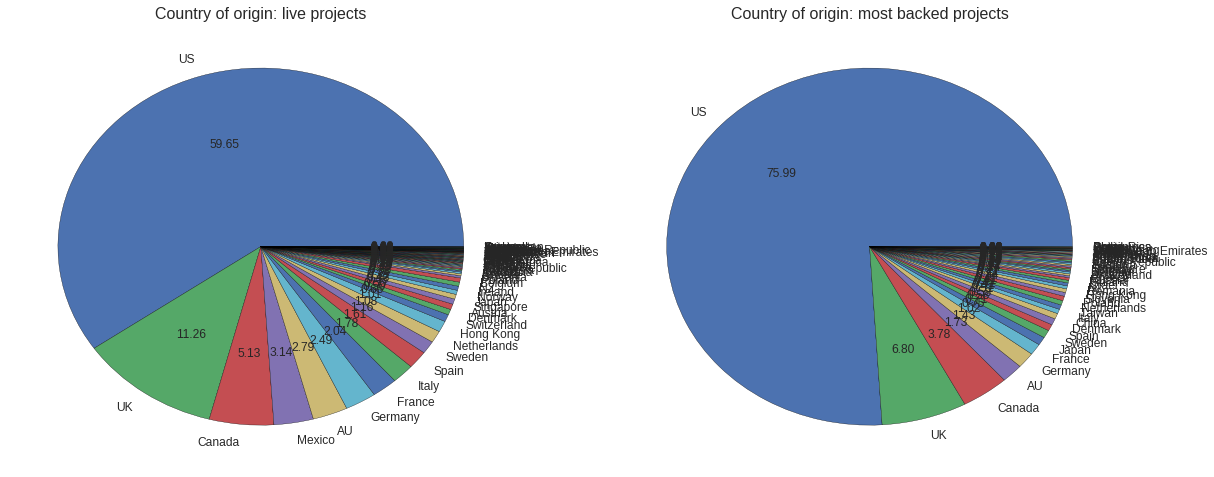

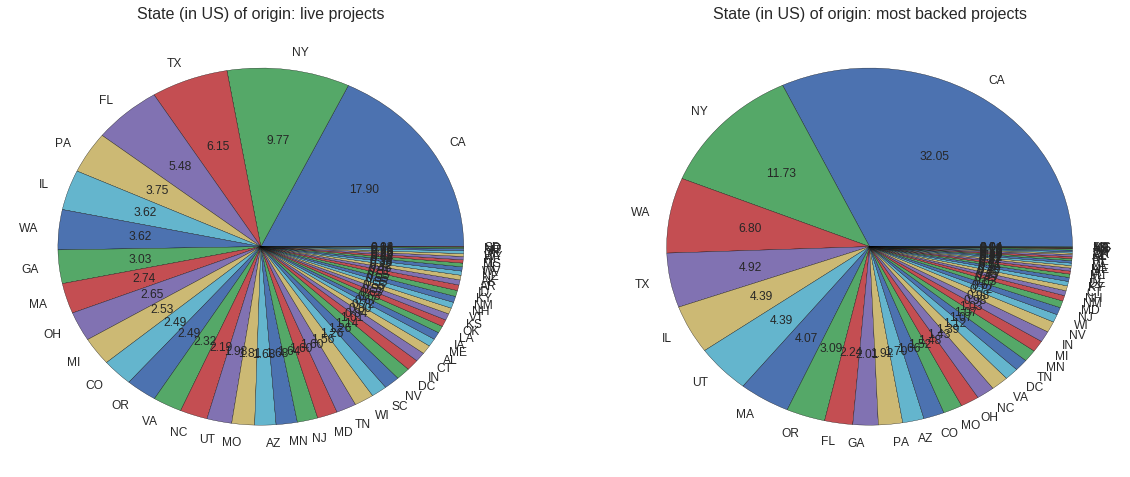

In [3]:
fig = plt.subplots(figsize=(20,8))
plt.subplot(121)
plt.title('Country of origin: live projects',fontsize=16)
df_live['Country_FullName'].value_counts().plot(kind='pie',autopct='%.2f', fontsize=12)
plt.ylabel('')
plt.subplot(122)
plt.title('Country of origin: most backed projects',fontsize=16)
df_most_backed['Country_FullName'].value_counts().plot(kind='pie',autopct='%.2f', fontsize=12)
plt.ylabel('')
plt.show()

fig = plt.subplots(figsize=(20,8))
plt.subplot(121)
plt.title('State (in US) of origin: live projects',fontsize=16)
df_live[df_live['Country_FullName']=='US'].State.value_counts().plot(kind='pie',autopct='%.2f', fontsize=12)
plt.ylabel('')
plt.subplot(122)
plt.title('State (in US) of origin: most backed projects',fontsize=16)
df_most_backed[df_most_backed['Country_FullName']=='US'].State.value_counts().plot(kind='pie',autopct='%.2f', fontsize=12)
plt.ylabel('')
plt.show()

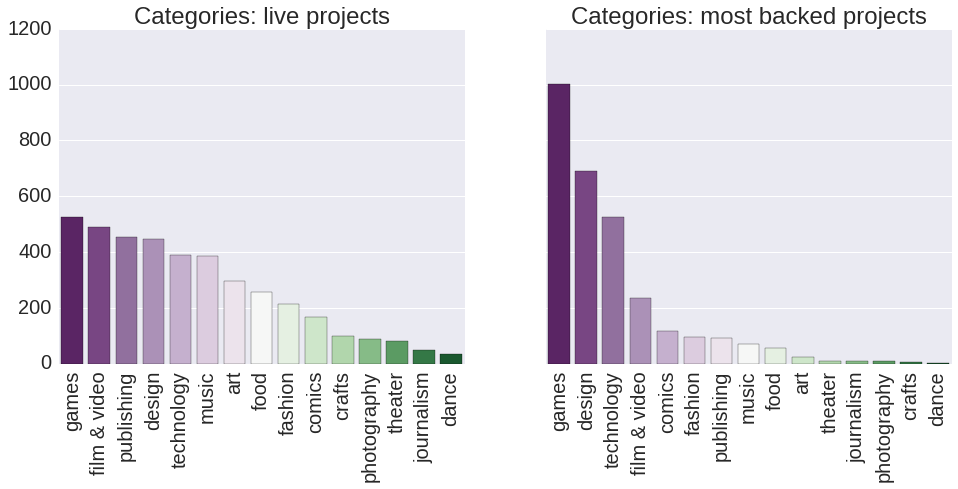

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,6))
Category_counts = df_live.Category.value_counts()
sns.barplot(x=Category_counts.index, y=Category_counts.values, palette="PRGn",ax=ax1)
ax1.set_title('Categories: live projects')
ax1.set_xticklabels(Category_counts.index, rotation=90)
Category_counts = df_most_backed.Category.value_counts()
sns.barplot(x=Category_counts.index, y=Category_counts.values, palette="PRGn",ax=ax2)
ax2.set_title('Categories: most backed projects')
ax2.set_xticklabels(Category_counts.index, rotation=90)
plt.show()

### Why are there such a huge difference between 'games' and 'technology' among the most backed projects?

- Suspected factor: cost per backer is higher for 'technology' projects.
- Is there a difference between distribution of USD/backers in these two categories?

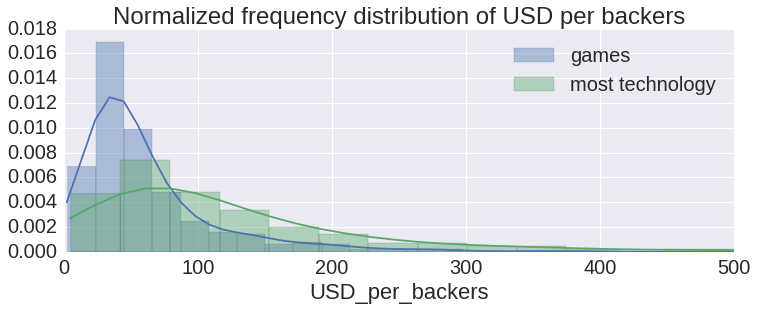

count    1001.000000
mean       64.699404
std        72.259426
min         2.615823
25%        30.260709
50%        44.495061
75%        72.147254
max      1055.531114
Name: USD_per_backers, dtype: float64

count     525.000000
mean      129.257962
std       149.558382
min         5.049145
25%        51.783395
50%        89.370135
75%       153.648207
max      1854.417266
Name: USD_per_backers, dtype: float64

Ttest_indResult(statistic=-9.3356123832855502, pvalue=1.5352886942606858e-19)


In [5]:
fig = plt.figure(figsize=(12,4))
plt.title('Normalized frequency distribution of USD per backers')
sns.distplot(df_most_backed[df_most_backed.Category=='games']['USD_per_backers'].dropna(),bins=50,label='games').set(xlim=(0, 500))
sns.distplot(df_most_backed[df_most_backed.Category=='technology']['USD_per_backers'].dropna(),bins=50,label='most technology').set(xlim=(0, 500))
plt.legend()
plt.show()

display( df_most_backed[df_most_backed.Category=='games']['USD_per_backers'].describe() )
display( df_most_backed[df_most_backed.Category=='technology']['USD_per_backers'].describe() )
print ttest_ind(df_most_backed[df_most_backed.Category=='games']['USD_per_backers'].values, \
                df_most_backed[df_most_backed.Category=='technology']['USD_per_backers'].values, \
                equal_var=False, nan_policy='omit')

### Comparing common words appearing in most popular categories

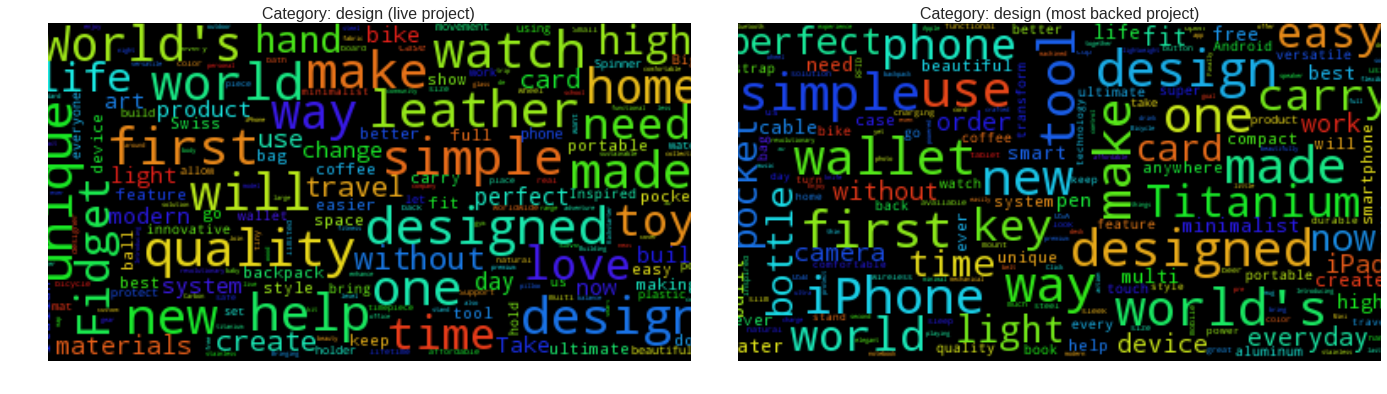

In [6]:
from gen_wordCloud_from_blurbs2 import *

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,6))
gen_wordCloud_from_blurbs2(df_live[df_live.Category=='design']['Project blurb'],'Category: design (live project)',ax1)
gen_wordCloud_from_blurbs2(df_most_backed[df_most_backed.Category=='design']['Project blurb'],'Category: design (most backed project)',ax2)

f.tight_layout()

### Design

__Live projects__: unique, quality, leather, toy

__most-backed projects__: iPhone, Titanium, wallet, key

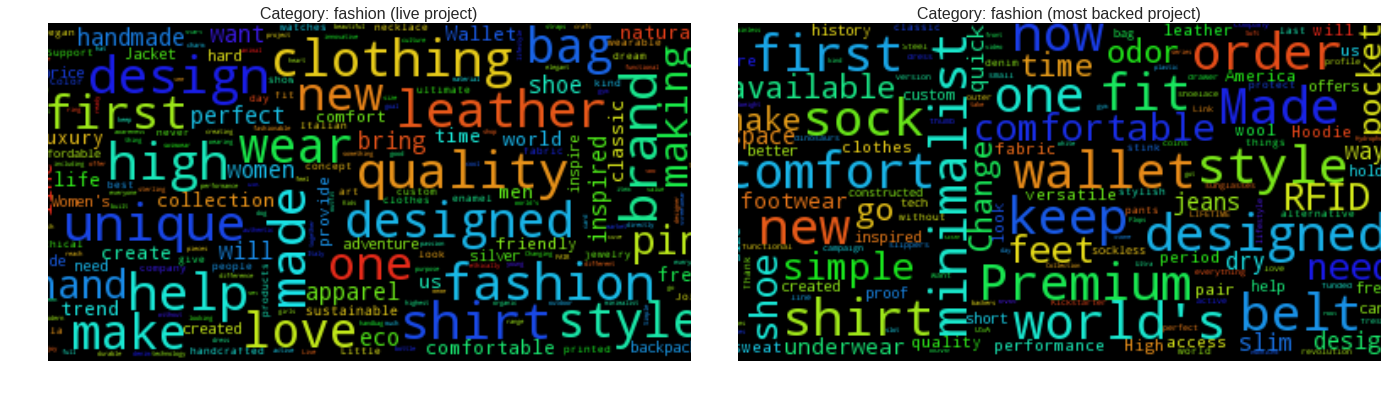

In [7]:
from gen_wordCloud_from_blurbs2 import *

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,6))
gen_wordCloud_from_blurbs2(df_live[df_live.Category=='fashion']['Project blurb'],'Category: fashion (live project)',ax1)
gen_wordCloud_from_blurbs2(df_most_backed[df_most_backed.Category=='fashion']['Project blurb'],'Category: fashion (most backed project)',ax2)

f.tight_layout()

### Fashion

__Live projects__: unique, leather

__most-backed projects__: (adj) premium, comfort, minimalist, (items) wallet, sock, pocket

### Does blurb length affect the attractiveness of projects?

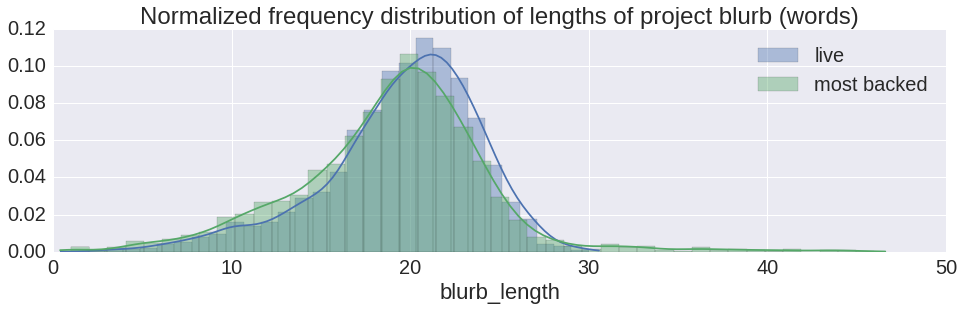

In [8]:
fig = plt.figure(figsize=(16,4))
plt.title('Normalized frequency distribution of lengths of project blurb (words)')
sns.distplot(df_live['blurb_length'].dropna(),bins=30,label='live')
sns.distplot(df_most_backed['blurb_length'].dropna(),bins=44,label='most backed')
plt.legend()
plt.show()

### Reason that I cannot apply t-test statistics
- The whole population of live projects is small (~4800). The sample here is already 1/3 of it.

In [9]:
display( df_live['blurb_length'].describe() )
display( df_most_backed['blurb_length'].describe() )
print ttest_ind(df_live['blurb_length'].values, df_most_backed['blurb_length'].values, \
                equal_var=True, nan_policy='omit')

count    3980.000000
mean       19.575879
std         4.377226
min         1.000000
25%        17.000000
50%        20.000000
75%        23.000000
max        30.000000
Name: blurb_length, dtype: float64

count    2940.000000
mean       19.012925
std         5.302792
min         1.000000
25%        16.000000
50%        20.000000
75%        22.000000
max        46.000000
Name: blurb_length, dtype: float64

Ttest_indResult(statistic=4.8304626017178238, pvalue=1.3914700702703136e-06)
